# ___Elliptic Envelope___

_If the input variables have a Gaussian distribution, then simple statistical methods can be used to detect outliers._

_For example, if the dataset has two input variables and both are Gaussian, then the feature space forms a multi-dimensional Gaussian and knowledge of this distribution can be used to identify values far from the distribution._

_This approach can be generalized by defining a hypersphere (ellipsoid) that covers the normal data, and data that falls outside this shape is considered an outlier (as shown in Fig 3). An efficient implementation of this technique for multivariate data is known as the Minimum Covariance Determinant, or Elliptic Envelope._

_It is unusual to have such well-behaved data, but if this is the case for your dataset, or you can use power transforms to make the variables Gaussian, then this approach might be appropriate._

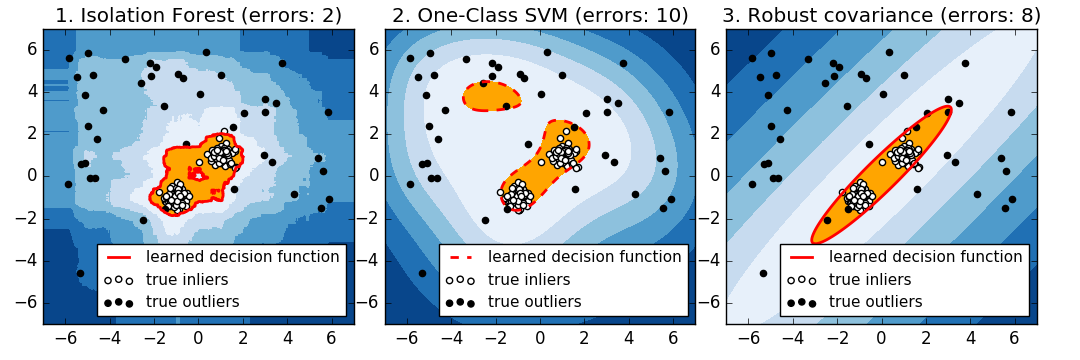

## ___Mall Customer Anomaly Detection___

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn-pastel')

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv(r'C:\Users\PiyushSin\Desktop\datasets\Mall_Customers.csv')
data.head()

data.columns

data=data.drop('CustomerID',axis=1)
data=data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Spend_Score'})

df=pd.get_dummies(data)
df

,Age,Income,Spend_Score,Gender_Female,Gender_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [6]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=.1,random_state=0)
clf.fit(df)

EllipticEnvelope(random_state=0)

In [7]:
ee_scores = pd.Series(clf.decision_function(df))
ee_scores

0     -1.001600
1     -0.628785
2     -4.096664
3      1.506029
4      2.790369
         ...   
195   -0.924366
196   -2.856229
197   -2.355918
198   -7.764044
199   -5.738007
Length: 200, dtype: float64

In [8]:
ee_predict = clf.predict(df)
ee_predict

array([-1, -1, -1,  1,  1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [9]:
ee_anomalies=pd.Series(ee_predict).replace([-1,1],[1,0])
num = df[['Income','Spend_Score']]
ee_anomalies = num[ee_anomalies ==1]
ee_anomalies

,Income,Spend_Score
0,15,39
1,15,81
2,16,6
6,18,6
8,19,3
10,19,14
11,19,99
60,46,56
134,73,5
138,74,10


Text(0, 0.5, 'Spend_Score')

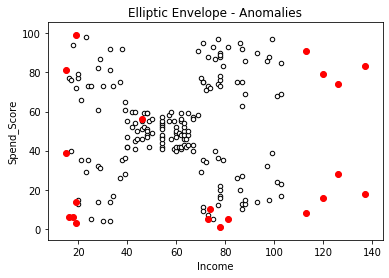

In [12]:
cmap=np.array(['white','red'])
plt.scatter(df.iloc[:,1],df.iloc[:,2],c='white',s=20,edgecolor='k')
plt.scatter(ee_anomalies.iloc[:,0],ee_anomalies.iloc[:,1],c='red')
plt.title('Elliptic Envelope - Anomalies')
plt.xlabel('Income')
plt.ylabel('Spend_Score')